In [1]:
# https://pybioportal.readthedocs.io/en/latest/index.html
# https://github.com/LLCampos/pybioportal
# https://pypi.org/project/pybioportal/
# https://www.biostars.org/p/106127/
# https://docs.cbioportal.org/user-guide/faq/#what-are-mrna-and-microrna-z-scores
# https://www.ebi.ac.uk/gxa/FAQ.html

In [2]:
#!pip install pybioportal
#!conda install -c matteo.valerio pybioportal
#!pip install autograd

In [3]:
#%config InlineBackend.figure_format = "retina"
#%matplotlib inline

In [4]:
import time; start = time.time()

In [5]:
from pybioportal import server_running_status as srs
from pybioportal import molecular_profiles as mf
from pybioportal import molecular_data as md
#          -          -          -          -          -          -          -          -          -          -          -  
import pandas as pd
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.precision', 3)

#        -         -        -        -         -        -         -        -        -         -
import warnings; warnings.filterwarnings("ignore")
#from scipy.stats import mannwhitneyu, normaltest
#from statannotations.Annotator import Annotator
#from statannot import add_stat_annotation
import matplotlib.pyplot as plt
import matplotlib.transforms
import autograd.numpy as np
import seaborn as sns

In [6]:
srs.get_server_status()

,status
0,UP


In [7]:
GenesOfInterest = ["PDCD1", "CD274", "CTLA4"]
GenesOfInterest = ["5133", "29126", "1493"]
GenesOfInterest = ["PDCD1", "CD274", "CTLA4"]

In [8]:
genes_df = pd.read_csv("./metadata/HGNC_table.txt", header=0, sep='\t', quotechar='"', on_bad_lines="warn")
genes_df = genes_df.dropna(subset=['NCBI Gene ID'])
genes_df["NCBI Gene ID"] = genes_df["NCBI Gene ID"].astype(int)
genes_df = genes_df[genes_df["Approved symbol"].isin(GenesOfInterest)]
genes_df = genes_df[['Approved symbol', 'NCBI Gene ID']].copy()
genes_df.rename({'NCBI Gene ID':'entrezGeneId', 'Approved symbol':'ApprovedSymbol'},axis=1,inplace=True)
genes_df.sample()

,ApprovedSymbol,entrezGeneId
28636,PDCD1,5133


In [9]:
genes = sorted(genes_df['ApprovedSymbol'].astype(str).unique().tolist()); print(genes)

['CD274', 'CTLA4', 'PDCD1']


In [10]:
NCBIgenes = sorted(genes_df['entrezGeneId'].astype(str).unique().tolist()); print(NCBIgenes)

['1493', '29126', '5133']


In [11]:
df1 = mf.get_all_molecular_profiles()
df1.sample(3)

,molecularAlterationType,datatype,name,description,showProfileInAnalysisTab,patientLevel,molecularProfileId,studyId,genericAssayType,pivotThreshold,sortOrder
1700,GENERIC_ASSAY,LIMIT-VALUE,Genetic Ancestry,Genetic ancestries were determined using five ...,True,False,pcpg_tcga_pan_can_atlas_2018_genetic_ancestry,pcpg_tcga_pan_can_atlas_2018,GENETIC_ANCESTRY,NaN,ASC
1122,PROTEIN_LEVEL,Z-SCORE,Protein expression z-scores (RPPA),"Protein expression, measured by reverse-phase ...",True,False,kich_tcga_rppa_Zscores,kich_tcga,NaN,NaN,NaN
1447,GENERIC_ASSAY,LIMIT-VALUE,Methylation (HM27 and HM450 merge),Methylation between-platform (hm27 and hm450) ...,True,False,brca_tcga_pan_can_atlas_2018_methylation_hm27_...,brca_tcga_pan_can_atlas_2018,METHYLATION,NaN,DESC


In [12]:
molecular_profiles = sorted(df1.molecularProfileId.unique().tolist()); print(molecular_profiles)

['acbc_mskcc_2015_cna', 'acbc_mskcc_2015_mutations', 'acbc_mskcc_2015_structural_variants', 'acc_2019_cna', 'acc_2019_mutations', 'acc_2019_structural_variants', 'acc_tcga_gistic', 'acc_tcga_linear_CNA', 'acc_tcga_methylation_hm450', 'acc_tcga_mutations', 'acc_tcga_pan_can_atlas_2018_armlevel_cna', 'acc_tcga_pan_can_atlas_2018_genetic_ancestry', 'acc_tcga_pan_can_atlas_2018_gistic', 'acc_tcga_pan_can_atlas_2018_log2CNA', 'acc_tcga_pan_can_atlas_2018_methylation_hm27_hm450_merge', 'acc_tcga_pan_can_atlas_2018_microbiome_signature', 'acc_tcga_pan_can_atlas_2018_mutations', 'acc_tcga_pan_can_atlas_2018_rna_seq_v2_mrna', 'acc_tcga_pan_can_atlas_2018_rna_seq_v2_mrna_median_Zscores', 'acc_tcga_pan_can_atlas_2018_rna_seq_v2_mrna_median_all_sample_Zscores', 'acc_tcga_pan_can_atlas_2018_rppa', 'acc_tcga_pan_can_atlas_2018_rppa_Zscores', 'acc_tcga_pan_can_atlas_2018_structural_variants', 'acc_tcga_rna_seq_v2_mrna', 'acc_tcga_rna_seq_v2_mrna_median_Zscores', 'acc_tcga_rna_seq_v2_mrna_median_all_s

In [13]:
molecularProfileIdType = "_tcga_rna_seq_v2_mrna"
filterout = ["_median_Zscores", "_median_all_sample_Zscores", "_gistic", "_linear_CNA", "_mutations", "_methylation_hm450", "_pan_can_atlas_",
             "rppa", "log2CNA", "structural_variants", "protein_quantification", "U133", "methylation_hm27", "tcga_mrna",
            ]

In [14]:
df1 = df1[~df1['molecularProfileId'].str.contains('|'.join(filterout))]
df1 = df1[df1['molecularProfileId'].str.contains(molecularProfileIdType)]

In [15]:
molecularProfileId_list = df1.molecularProfileId.unique().tolist()

In [16]:
%%time
data = md.fetch_molecular_data(entrez_gene_ids=NCBIgenes, molecular_profile_ids=molecularProfileId_list)
data.sample(3)

CPU times: total: 2.98 s
Wall time: 3.75 s


,uniqueSampleKey,uniquePatientKey,entrezGeneId,molecularProfileId,sampleId,patientId,studyId,value
13036,VENHQS1DWi01NDY3LTAxOmtpcmNfdGNnYQ,VENHQS1DWi01NDY3OmtpcmNfdGNnYQ,29126,kirc_tcga_rna_seq_v2_mrna,TCGA-CZ-5467-01,TCGA-CZ-5467,kirc_tcga,23.296
21985,VENHQS1SVC1BNlk5LTAxOnBjcGdfdGNnYQ,VENHQS1SVC1BNlk5OnBjcGdfdGNnYQ,29126,pcpg_tcga_rna_seq_v2_mrna,TCGA-RT-A6Y9-01,TCGA-RT-A6Y9,pcpg_tcga,122.783
11754,VENHQS1CMi1BNFNSLTAxOmtpcmNfdGNnYQ,VENHQS1CMi1BNFNSOmtpcmNfdGNnYQ,1493,kirc_tcga_rna_seq_v2_mrna,TCGA-B2-A4SR-01,TCGA-B2-A4SR,kirc_tcga,40.112


In [17]:
metadata_df = pd.read_csv("./metadata/TCGA_StudyIDs.txt", header=0, sep='\t', quotechar='"', on_bad_lines="warn")
data = pd.merge(data,metadata_df, on='studyId', how='inner')

In [18]:
cols = ['uniqueSampleKey', 'uniquePatientKey', 'patientId', 'studyId']; data.drop(cols, axis = 1, inplace = True)

In [19]:
print(data.value.isnull().sum())
data.dropna(subset=['value'], inplace=True)

0


In [20]:
data[data['value']==0].count()

entrezGeneId          358
molecularProfileId    358
sampleId              358
value                 358
CancerType            358
dtype: int64

In [21]:
data = pd.merge(data, genes_df, on='entrezGeneId', how='inner')

In [22]:
data = data[data['value']!=0]
data.sort_values(by="value", ascending=True).head(3)

,entrezGeneId,molecularProfileId,sampleId,value,CancerType,ApprovedSymbol
20397,1493,kirp_tcga_rna_seq_v2_mrna,TCGA-BQ-7051-01,0.198,KIRP,CTLA4
20430,1493,kirp_tcga_rna_seq_v2_mrna,TCGA-DZ-6133-01,0.230,KIRP,CTLA4
26955,1493,thca_tcga_rna_seq_v2_mrna,TCGA-DE-A2OL-01,0.233,THCA,CTLA4


In [23]:
data.entrezGeneId = data.entrezGeneId.apply(str)
data_log2 = data.apply(lambda x: np.log2(x + 1) if np.issubdtype(x.dtype, np.number)else x)
data_log2.sample(3)

,entrezGeneId,molecularProfileId,sampleId,value,CancerType,ApprovedSymbol
21403,29126,paad_tcga_rna_seq_v2_mrna,TCGA-HV-A5A5-01,4.983,PAAD,CD274
21319,29126,paad_tcga_rna_seq_v2_mrna,TCGA-IB-7889-01,3.600,PAAD,CD274
19513,29126,ov_tcga_rna_seq_v2_mrna,TCGA-04-1357-01,6.245,OV,CD274


In [24]:
TumorTypes = sorted(data_log2.CancerType.unique().tolist()); print(TumorTypes)

['ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COADREAD', 'DLBC', 'ESCA', 'GBM', 'HNSC', 'KICH', 'KIRC', 'KIRP', 'LAML', 'LGG', 'LIHC', 'LUAD', 'LUSC', 'MESO', 'OV', 'PAAD', 'PCPG', 'PRAD', 'SARC', 'SKCM', 'STAD', 'TGCT', 'THCA', 'THYM', 'UCEC', 'UCS', 'UVM']


In [25]:
genes      = sorted(data_log2['ApprovedSymbol'].astype(str).unique().tolist()); print(genes)

['CD274', 'CTLA4', 'PDCD1']


In [26]:
kws1 = {'s':3.5, 'jitter':.30, 'alpha':0.2, 'dodge':False, 'linewidth':0.2,'edgecolor':'#1E1E1E'}
kws2 = {'linewidth':0.5,'dodge':False, 'showcaps':True, 'whis':1.5, 'fliersize':0, 'saturation':0.75,}
medianprops=dict(color="red", alpha=0.8); capprops=dict(alpha=.5, linewidth=.5); boxprops=dict(alpha=.5, linewidth=.5)
whiskerprops=dict(linestyle="--", linewidth=.5, color="#7E7E7E");

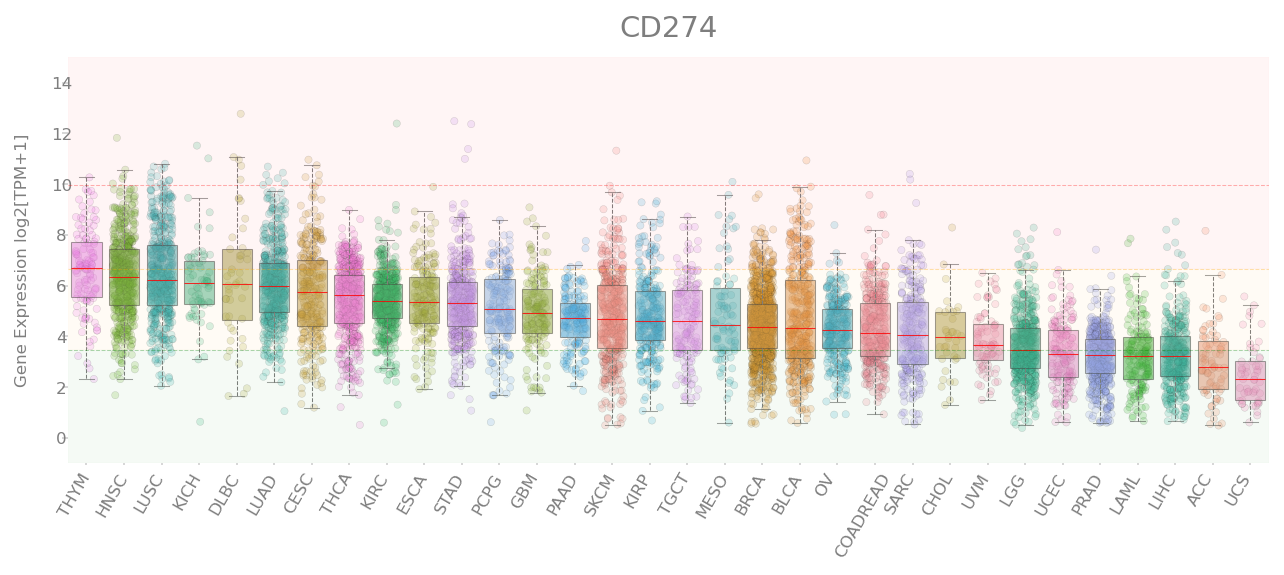

In [ ]:
%%time
#          -          -          -          -          -          -          -          -          -          -          -  
for gene in sorted(genes):
    fig, ax    = plt.subplots(figsize=(22/2.54, 10/2.54), dpi=150)
    log2_df2   = data_log2.loc[data_log2.ApprovedSymbol == gene]; #print(log2_df2.sample())
    #          -          -          -          -          -          -          -          -          -          -          -       
    median_df  = log2_df2.groupby(['CancerType'])['value'].median().sort_values(ascending=False).reset_index()
    TumorTypes = median_df.CancerType.tolist()
    #          -          -          -          -          -          -          -          -          -          -          -     
    g = sns.stripplot(data=log2_df2, x='CancerType', y='value', hue="CancerType", order=TumorTypes, **kws1, zorder=0, ax=ax)
    g = sns.boxplot(data=log2_df2,   x='CancerType', y='value', hue="CancerType", order=TumorTypes, medianprops=medianprops, 
                    capprops=capprops, boxprops=boxprops, whiskerprops=whiskerprops, **kws2, zorder=1, ax=ax)
    #          -          -          -          -          -          -          -          -          -          -          -  
    ax.set_title(gene, fontsize=14, color="#7E7E7E", pad=10)
    ax.set_ylim([-1, 15]); ax.set_yscale('linear'); sns.despine(left=True, bottom=True)    
    plt.xlabel("", fontsize=0); plt.ylabel("Gene Expression log2[TPM+1]", fontsize=8, color="#7E7E7E", labelpad=10)
    #          -          -          -          -          -          -          -          -          -          -          -       
    ax.tick_params(axis="x", which='major', colors="#cfcfcf", pad=0, length=1)
    ax.tick_params(axis="y", which='major', colors="#cfcfcf", pad=0, length=3)
    plt.yticks(fontsize=8, color="#7E7E7E", ha="center", rotation=0, rotation_mode='default')
    plt.setp(ax.xaxis.get_majorticklabels(), fontsize=8, color="#7E7E7E", ha="center", rotation=60, rotation_mode='default')
    #          -          -          -          -          -          -          -          -          -          -          - 
    dx = -12/150; dy = -5/150 
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
    for label in ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)
    #          -          -          -          -          -          -          -          -          -          -          - 
    kws_lines = {"ls":"--", "alpha":0.3, "linewidth":.5}
    plt.axhline(y=3.46, color="g", **kws_lines); plt.axhline(y=6.67, color="orange", **kws_lines); plt.axhline(y=9.97, color="red", **kws_lines)
    kws_box   = {'lw':.2, 'alpha':0.04, 'edgecolor':None}
    plt.axhspan(-1, 3.46, color='green', **kws_box); plt.axhspan(3.46, 6.67, color='orange', **kws_box); plt.axhspan(6.67, 15, color='red', **kws_box)
    #          -          -          -          -          -          -          -          -          -          -          -     
    plt.legend([],[],frameon=False)
    plt.tight_layout(); plt.show(); #plt.close()
    plt.savefig("tcga.png", format="png", bbox_inches="tight", dpi=300)

In [ ]:
print("'cBioPortal_API.v002' script run time:", f'{time.time()-start:.0f}', "seconds.")